In [1]:
import tensorflow as tf
x = tf.random.normal(shape = (2, 1))
print(x)

x = tf.ones(2, 5)
print(x)

x = tf.ones((2, 5))
print(x)

tf.Tensor(
[[0.1667727 ]
 [0.03938165]], shape=(2, 1), dtype=float32)
tf.Tensor([1 1], shape=(2,), dtype=int16)
tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(2, 5), dtype=float32)


In [2]:
v = tf.Variable(initial_value = 3)
print(v)

v1 = tf.Variable(initial_value = tf.random.normal(shape = (3, 3)))
print(v1)

v2 = v1

sum = v1 + v2
print(sum)

mul = tf.matmul(v1, v2)
print(mul)


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>
<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.22783273,  0.05365755, -0.8430511 ],
       [ 0.31192   , -0.4868151 , -0.17915772],
       [-0.2635693 ,  0.7586517 ,  1.400516  ]], dtype=float32)>
tf.Tensor(
[[-0.45566547  0.10731511 -1.6861022 ]
 [ 0.62384    -0.9736302  -0.35831544]
 [-0.5271386   1.5173033   2.801032  ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 0.290847   -0.6779284  -0.9982451 ]
 [-0.17569247  0.11780749 -0.42666107]
 [-0.07244471  0.6790383   2.0477293 ]], shape=(3, 3), dtype=float32)


In [3]:
m2 = tf.Variable(tf.ones((3, 3)))
print(f'print m2 {m2}')

m1 = tf.Variable(tf.random.normal((3, 3), mean=3))
#scalar mean
print(m1)

mul = tf.ones((3, 3))
print(mul)
# mul.assign(m1) wrong
m2.assign(m1)


print m2 <tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[3.592801 , 2.6244214, 2.971499 ],
       [2.6356528, 2.989206 , 2.7009103],
       [1.1752108, 1.6439302, 2.9391341]], dtype=float32)>
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[3.592801 , 2.6244214, 2.971499 ],
       [2.6356528, 2.989206 , 2.7009103],
       [1.1752108, 1.6439302, 2.9391341]], dtype=float32)>

##Gradient Tape

In [4]:
time = tf.Variable(initial_value=1, dtype= 'float32')
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


#**Linear Classifier in Tensorflow**

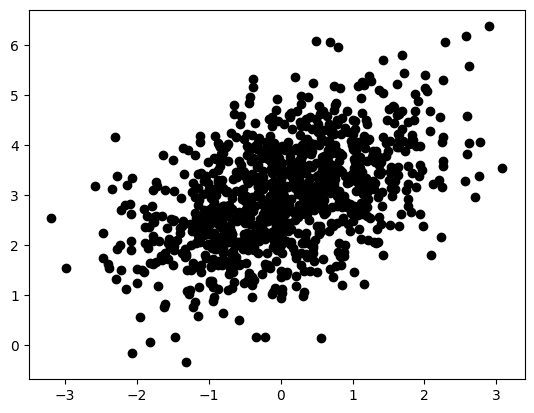

In [5]:
import matplotlib.pyplot as plt
import numpy as np
num_sample = 1000
negative_part = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_sample)
# positive_part = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_sample)

plt.scatter(negative_part[:, 0], negative_part[:, 1], c='black')
plt.show()


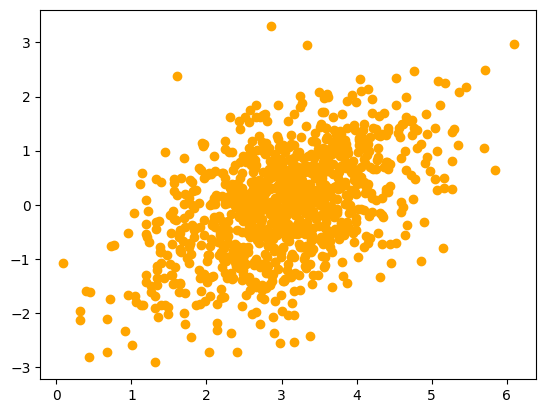

In [6]:
positive_part = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_sample)

plt.scatter(positive_part[:, 0], positive_part[:, 1], c='orange')
plt.show()

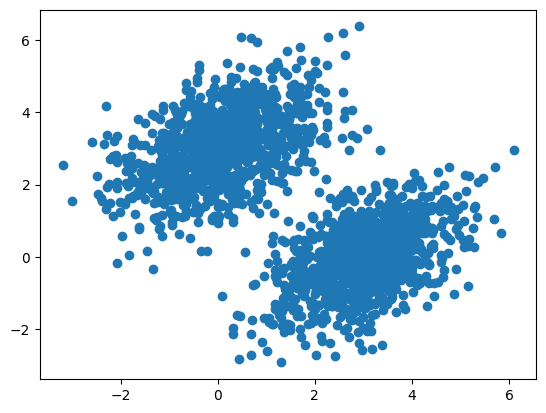

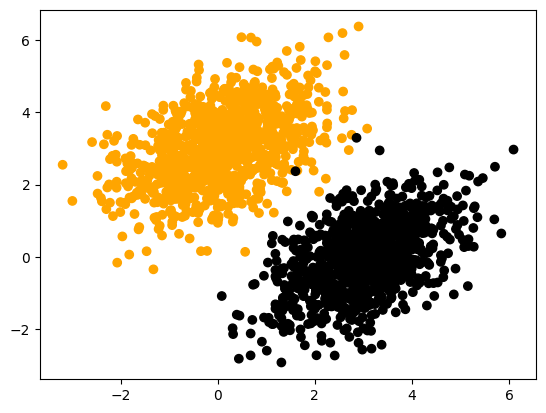

In [7]:
marge = np.vstack((negative_part, positive_part))
plt.scatter(marge[:, 0], marge[:, 1])
plt.show()

targets = np.vstack((np.zeros((num_sample, 1)), np.ones((num_sample, 1))))
colors = np.where(targets[:, 0] > 0, 'black', 'orange')
plt.scatter(marge[:, 0], marge[:, 1], c=colors)
plt.show()

In [38]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [26]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [27]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [28]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  gradients = tape.gradient(loss, [W, b])
  W.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)
  return loss

In [41]:
marge = marge.astype(np.float32)
targets = targets.astype(np.float32)
type(marge)
for steps in range(50):
  loss = training_step(marge, targets)
  print(f'Steps {steps}, Loss {loss}')

Steps 0, Loss 0.032189399003982544
Steps 1, Loss 0.031613290309906006
Steps 2, Loss 0.031085724011063576
Steps 3, Loss 0.030602607876062393
Steps 4, Loss 0.0301602054387331
Steps 5, Loss 0.029755083844065666
Steps 6, Loss 0.029384098947048187
Steps 7, Loss 0.02904437482357025
Steps 8, Loss 0.028733275830745697
Steps 9, Loss 0.028448395431041718
Steps 10, Loss 0.028187517076730728
Steps 11, Loss 0.027948619797825813
Steps 12, Loss 0.027729861438274384
Steps 13, Loss 0.027529530227184296
Steps 14, Loss 0.027346080169081688
Steps 15, Loss 0.027178093791007996
Steps 16, Loss 0.02702425792813301
Steps 17, Loss 0.026883384212851524
Steps 18, Loss 0.026754384860396385
Steps 19, Loss 0.02663625404238701
Steps 20, Loss 0.026528075337409973
Steps 21, Loss 0.026429016143083572
Steps 22, Loss 0.026338303461670876
Steps 23, Loss 0.026255233213305473
Steps 24, Loss 0.02617916278541088
Steps 25, Loss 0.02610950544476509
Steps 26, Loss 0.02604571357369423
Steps 27, Loss 0.025987301021814346
Steps 28, 

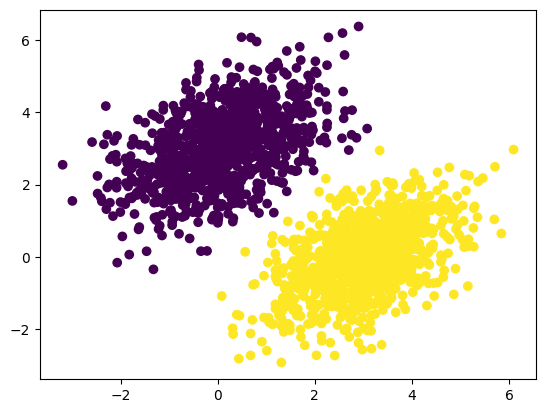

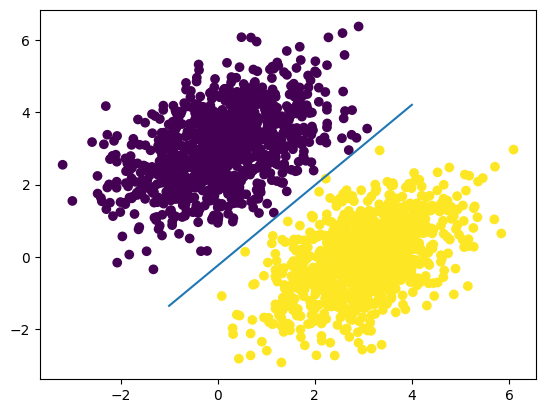

In [45]:
predictions = model(marge)
colors = np.where(predictions[:, 0] > 0, 'black', 'orange')
plt.scatter(marge[:, 0], marge[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

x = np.linspace(-1, 4, num=100)
y = -W[0][0] / W[1][0] * x + (0.5 - b) / W[1][0]
plt.plot(x, y)
plt.scatter(marge[:, 0], marge[:, 1], c=predictions[:, 0] > 0.5)